# Murphy 9 and 10, Linear Models
Berkan Ottlik

In [1]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_classification

RANDOM_STATE = 39

## Datasets

### Synthetic

In [2]:
SAMPLES = 100
DATA_DIM = 16

X = np.random.randn(SAMPLES, DATA_DIM)
y = np.random.randint(2, size=(SAMPLES))

In [3]:
# META_SAMPLES = 1000
# IN_CONTEXT_SAMPLES = 18
# DATA_DIM = 16

# X = np.random.randn(META_SAMPLES, IN_CONTEXT_SAMPLES, DATA_DIM)
# y = np.random.randint(2, size=(META_SAMPLES, IN_CONTEXT_SAMPLES))

### Embedding

In [4]:
# import sys
# import csv

# csv.field_size_limit(sys.maxsize)

# # Load a csv to a df
# df = pd.read_csv("data/embeddingData.csv", engine="python")

# df

## Classification

In [5]:
def hold_out_valdiator(clf, X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=RANDOM_STATE)
    clf.fit(X_train, y_train)

    return accuracy_score(clf.predict(X_test), y_test)

In [6]:
def get_data(samples, data_dim):
    # X = np.random.randn(samples, data_dim)
    # y = np.random.randint(2, size=(samples))
    
    X, y = make_classification(n_samples=samples, n_features=data_dim, random_state=RANDOM_STATE)
    
    return X, y

In [7]:
def get_moons(samples, data_dim):
    X, y = make_moons(n_samples=samples, n_features=data_dim, random_state=RANDOM_STATE)
    
    return X, y

In [8]:
def get_blobs(samples, data_dim):
    X, y = make_blobs(n_samples=samples, centers=2, cluster_std=10, n_features=data_dim, random_state=RANDOM_STATE)
    
    return X, y

In [9]:
DATA_DIM = 400

def train_many_models(clf):
    print(f"===Classifier: {clf}===")
    # for samples in [5, 10, 16, 20, 100, 1000]:
    for samples in [100, 350, 400, 450, 600, 1000]:
        print(f"Samples: {samples}")
        for data_generator in [get_data]:
            print(f"Data Generator: {data_generator.__name__}")
            # try:
            X, y = data_generator(samples, DATA_DIM)
        
            for test_size in [0.1, 0.2, 0.3, 0.4]:
                print(f"Hold Out Accuracy with Test Size={test_size}: {hold_out_valdiator(clf, X, y, test_size=test_size)}")
            # except:
            #     pass

### QuadraticDiscriminantAnalysis

In [10]:
# clf = QuadraticDiscriminantAnalysis()

# train_many_models(clf)

### LinearDiscriminantAnalysis

In [11]:
clf = LinearDiscriminantAnalysis()

train_many_models(clf)

===Classifier: LinearDiscriminantAnalysis()===
Samples: 100
Data Generator: get_data
Hold Out Accuracy with Test Size=0.1: 0.5
Hold Out Accuracy with Test Size=0.2: 0.7
Hold Out Accuracy with Test Size=0.3: 0.6333333333333333
Hold Out Accuracy with Test Size=0.4: 0.6
Samples: 350
Data Generator: get_data


Hold Out Accuracy with Test Size=0.1: 0.7428571428571429
Hold Out Accuracy with Test Size=0.2: 0.7857142857142857
Hold Out Accuracy with Test Size=0.3: 0.7714285714285715
Hold Out Accuracy with Test Size=0.4: 0.8285714285714286
Samples: 400
Data Generator: get_data
Hold Out Accuracy with Test Size=0.1: 0.575
Hold Out Accuracy with Test Size=0.2: 0.5875
Hold Out Accuracy with Test Size=0.3: 0.6833333333333333
Hold Out Accuracy with Test Size=0.4: 0.75625
Samples: 450
Data Generator: get_data
Hold Out Accuracy with Test Size=0.1: 0.5333333333333333
Hold Out Accuracy with Test Size=0.2: 0.5222222222222223
Hold Out Accuracy with Test Size=0.3: 0.6074074074074074
Hold Out Accuracy with Test Size=0.4: 0.6777777777777778
Samples: 600
Data Generator: get_data
Hold Out Accuracy with Test Size=0.1: 0.75
Hold Out Accuracy with Test Size=0.2: 0.5333333333333333
Hold Out Accuracy with Test Size=0.3: 0.6
Hold Out Accuracy with Test Size=0.4: 0.5958333333333333
Samples: 1000
Data Generator: get_data


### LogisticRegression

In [12]:
clf = LogisticRegression()

train_many_models(clf)

===Classifier: LogisticRegression()===
Samples: 100
Data Generator: get_data
Hold Out Accuracy with Test Size=0.1: 0.9
Hold Out Accuracy with Test Size=0.2: 0.75
Hold Out Accuracy with Test Size=0.3: 0.6
Hold Out Accuracy with Test Size=0.4: 0.675
Samples: 350
Data Generator: get_data
Hold Out Accuracy with Test Size=0.1: 0.8
Hold Out Accuracy with Test Size=0.2: 0.8714285714285714
Hold Out Accuracy with Test Size=0.3: 0.8571428571428571
Hold Out Accuracy with Test Size=0.4: 0.8357142857142857
Samples: 400
Data Generator: get_data
Hold Out Accuracy with Test Size=0.1: 0.775
Hold Out Accuracy with Test Size=0.2: 0.7375
Hold Out Accuracy with Test Size=0.3: 0.775
Hold Out Accuracy with Test Size=0.4: 0.75
Samples: 450
Data Generator: get_data
Hold Out Accuracy with Test Size=0.1: 0.7111111111111111
Hold Out Accuracy with Test Size=0.2: 0.7444444444444445
Hold Out Accuracy with Test Size=0.3: 0.7555555555555555
Hold Out Accuracy with Test Size=0.4: 0.75
Samples: 600
Data Generator: get_da

## Plotting Results

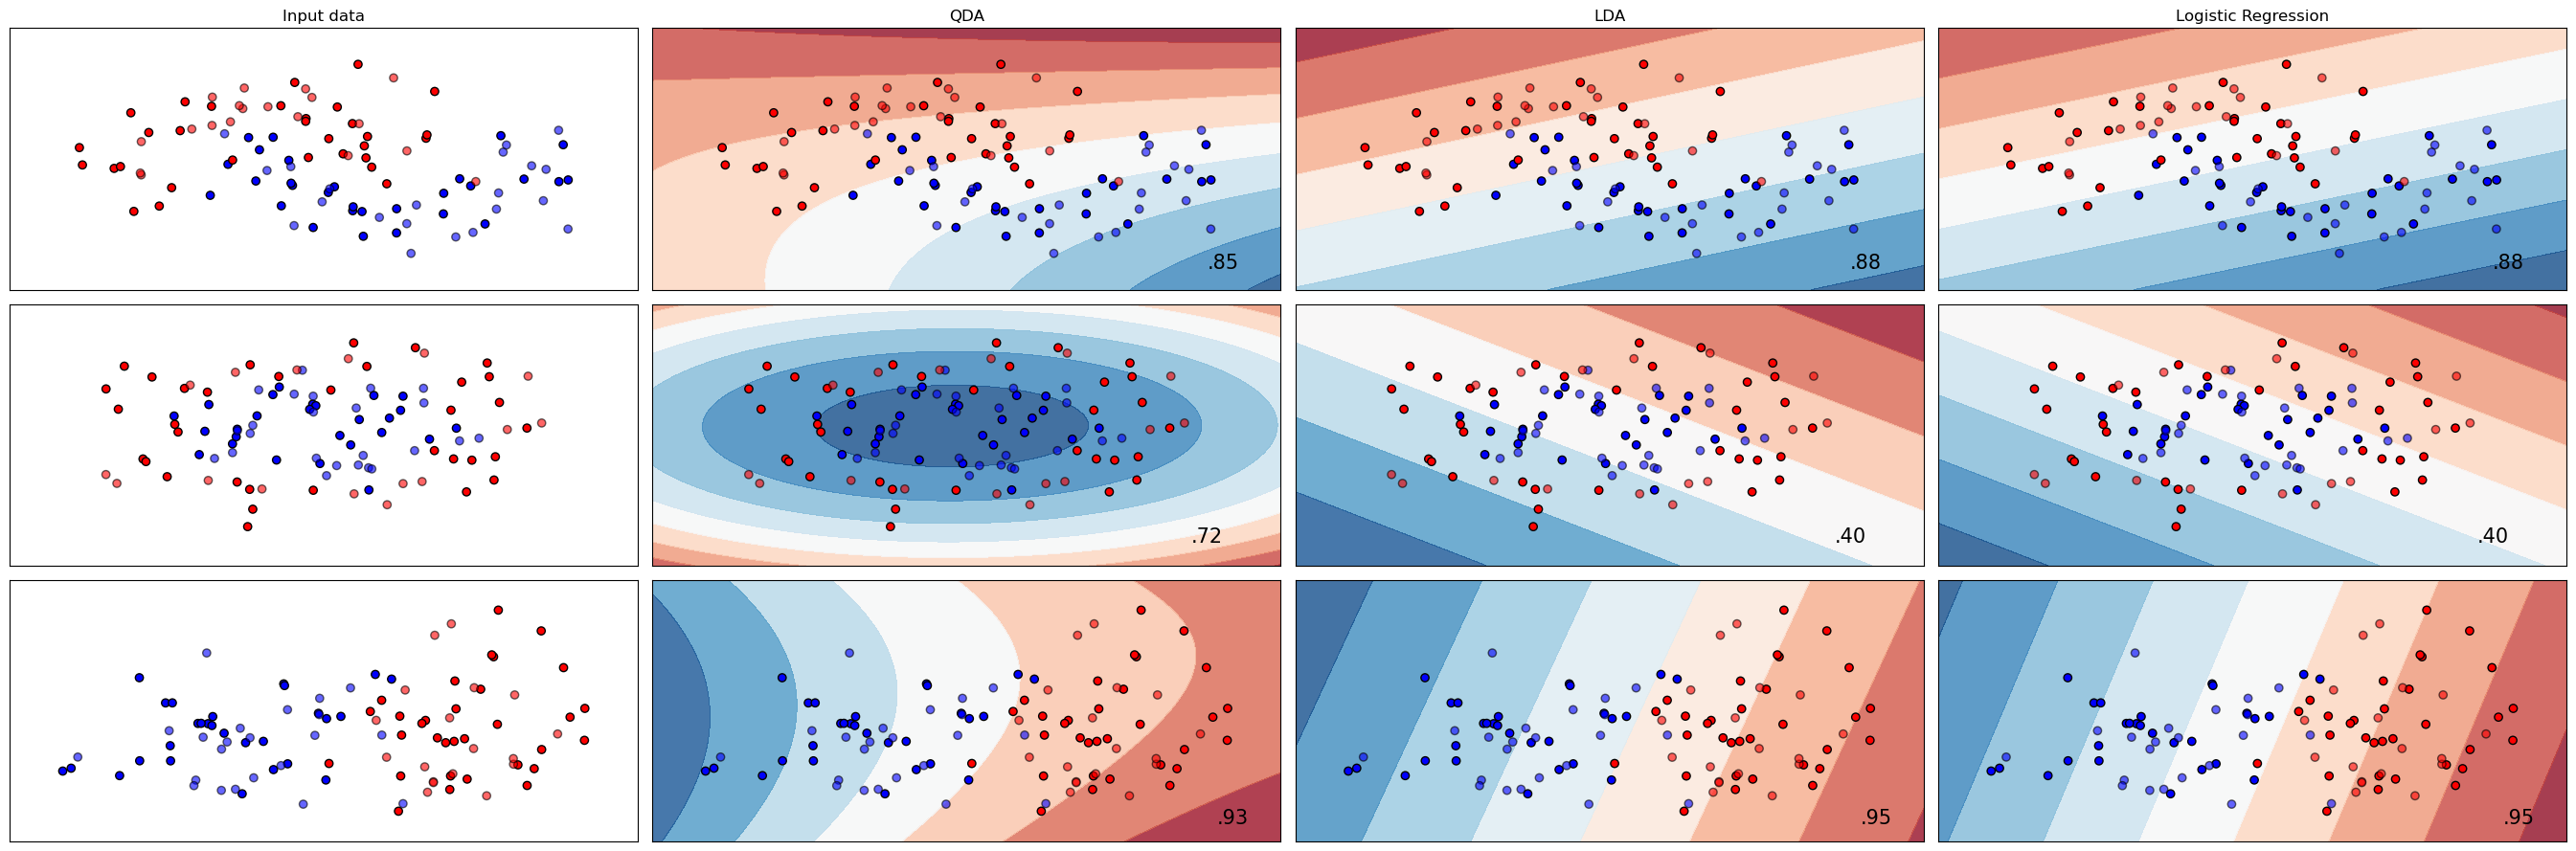

In [13]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "QDA",
    "LDA",
    "Logistic Regression",
]

classifiers = [
    # KNeighborsClassifier(3),
    # SVC(kernel="linear", C=0.025),
    # SVC(gamma=2, C=1),
    # GaussianProcessClassifier(1.0 * RBF(1.0)),
    # DecisionTreeClassifier(max_depth=5),
    # RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    # MLPClassifier(alpha=1, max_iter=1000),
    # AdaBoostClassifier(),
    # GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    LogisticRegression(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()